# Group proposal
### Determining patients' survival rate after 5 years
#### DSCI 100 008 Group 31

# 1.Introduction

A dataset (Haberman’s Survival Data Set) was collected between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. Many scholars including, Haberman (1976), and Landwehr and colleagues (1984) have used this dataset to answer predictive questions. This is a multivariant single disease (breast cancer) dataset with variables as follow, Age of patient at time of operation (age_of_operation), Patient’s year of operation (year_of_operationand Number of positive axillary nodes detected (number_nodes). In this paper, we are aiming to answer our predictive question using this dataset. We aim to find whether our patient survives after 5 years if the patient’s age and the number of positive axillary nodes detected in the patient ‘s body are known. We will use 75 percent of the model for training data.


### Haberman's Survival Data Set

https://archive.ics.uci.edu/ml/datasets/Haberman%2527s+Survival


Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biomet

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(2000)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following object is masked from ‘package:tidyr’:

    matches


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0  

# 2.Preliminary exploratory data analysis

### Load the data and assign it to an object called 'patient data'.

In [2]:
# Dataset can be read from the web into R 
patient_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",
                col_names = c("age_when_operation", "year_of_operation", "number_nodes", "survival_status"))
patient_data

Rows: 306 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): age_when_operation, year_of_operation, number_nodes, survival_status

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age_when_operation,year_of_operation,number_nodes,survival_status
<dbl>,<dbl>,<dbl>,<dbl>
30,64,1,1
30,62,3,1
30,65,0,1
⋮,⋮,⋮,⋮
77,65,3,1
78,65,1,2
83,58,2,2


### Cleaning and wrangling patient_data

We first need to create the training and testing datasets. Split the data using 75% of the patient data as our training set and set survival_status as the strata argument. Store this data into an object called `patient_split`.
Then, use the appropriate training and testing functions to create our training set which we will call `patient_training` and our testing set which we will call `patient_testing`. We must mutate `survival_status` using `as_factor()` function at very begin because the predicted variable must be categorial.

In [12]:
patient_data <- patient_data |>
                mutate(survival_status = as_factor(survival_status))
patient_split <- initial_split(patient_data, prop = 0.75, strata = survival_status)
patient_training <- training(patient_split)
patient_testing <- testing(patient_split)

patient_training       

age_when_operation,year_of_operation,number_nodes,survival_status
<dbl>,<dbl>,<dbl>,<fct>
30,62,3,1
31,65,4,1
33,58,10,1
⋮,⋮,⋮,⋮
74,65,3,2
78,65,1,2
83,58,2,2


### Summarize the data

In [4]:
#Calculate the mean age of when operation happens for each patient's survival status
patients_avg_age <- patient_training |>       
                    group_by(survival_status) |> 
                    summarize(avg_age_operation = mean(age_when_operation, na.rm = TRUE))
patients_avg_age

survival_status,avg_age_operation
<fct>,<dbl>
1,52.60119
2,53.16667


From the table above we can tell the difference between age of patients when they did operation is small. It tells us the age patients did operations might don't affect too much on their survival status.

In [5]:
#Calculate the mean value of number of positive axillary nodes detected for each patient's survival status
patients_avg_nodes <- patient_training |>       
                      group_by(survival_status) |> 
                      summarize(avg_number_nodes = mean(number_nodes, na.rm = TRUE))
patients_avg_nodes

survival_status,avg_number_nodes
<fct>,<dbl>
1,2.994048
2,7.700000


From the table above we can tell the average number of positive axillary nodes detected appears higher in patients who's survival status is 2, which means the patients died within 5 years will probably have higher amount of positive axillary nodes.

### Visualizing the data

Now we want to find whether there is a relationship between patient's survival status with other three variables. To find the answer, we will use histogram plot.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



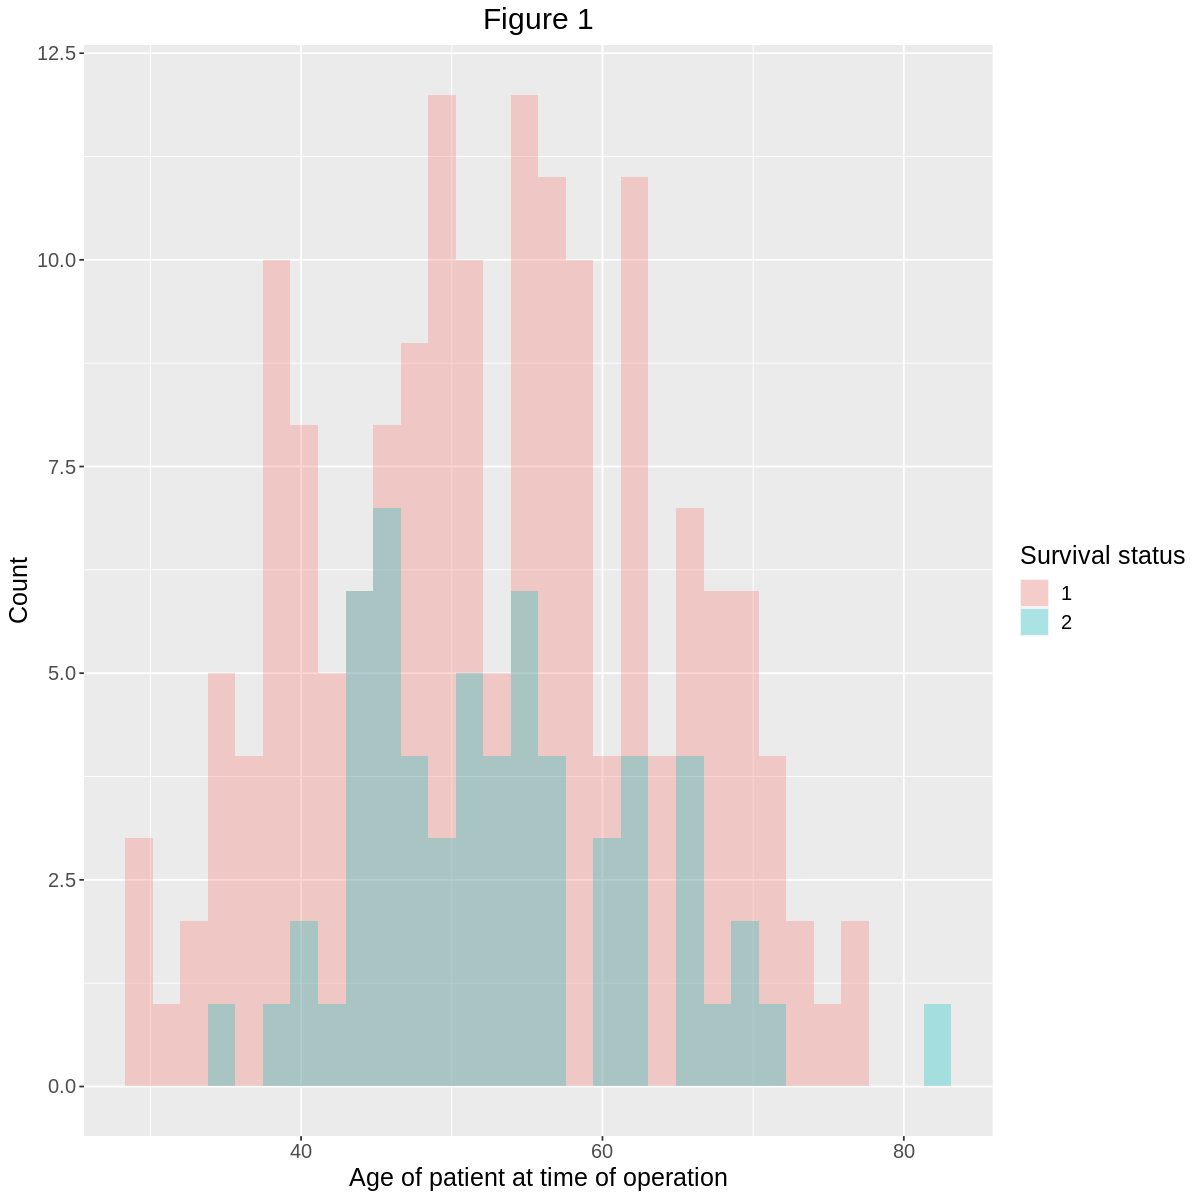

In [6]:
## Figure 1: Age distribution
options(repr.plot.width = 10, repr.plot.height = 10)

age_histogram <- patient_training |>
                 ggplot(aes(x = age_when_operation, fill = survival_status)) +
                 geom_histogram(alpha = 0.3, position = "identity") +
                 labs(x = "Age of patient at time of operation", y = "Count", fill = "Survival status") +
                 ggtitle("Figure 1") +
                 theme(text = element_text(size = 15),
                 plot.caption = element_text(hjust = 0.5),
                 plot.title = element_text(hjust = 0.5))

age_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



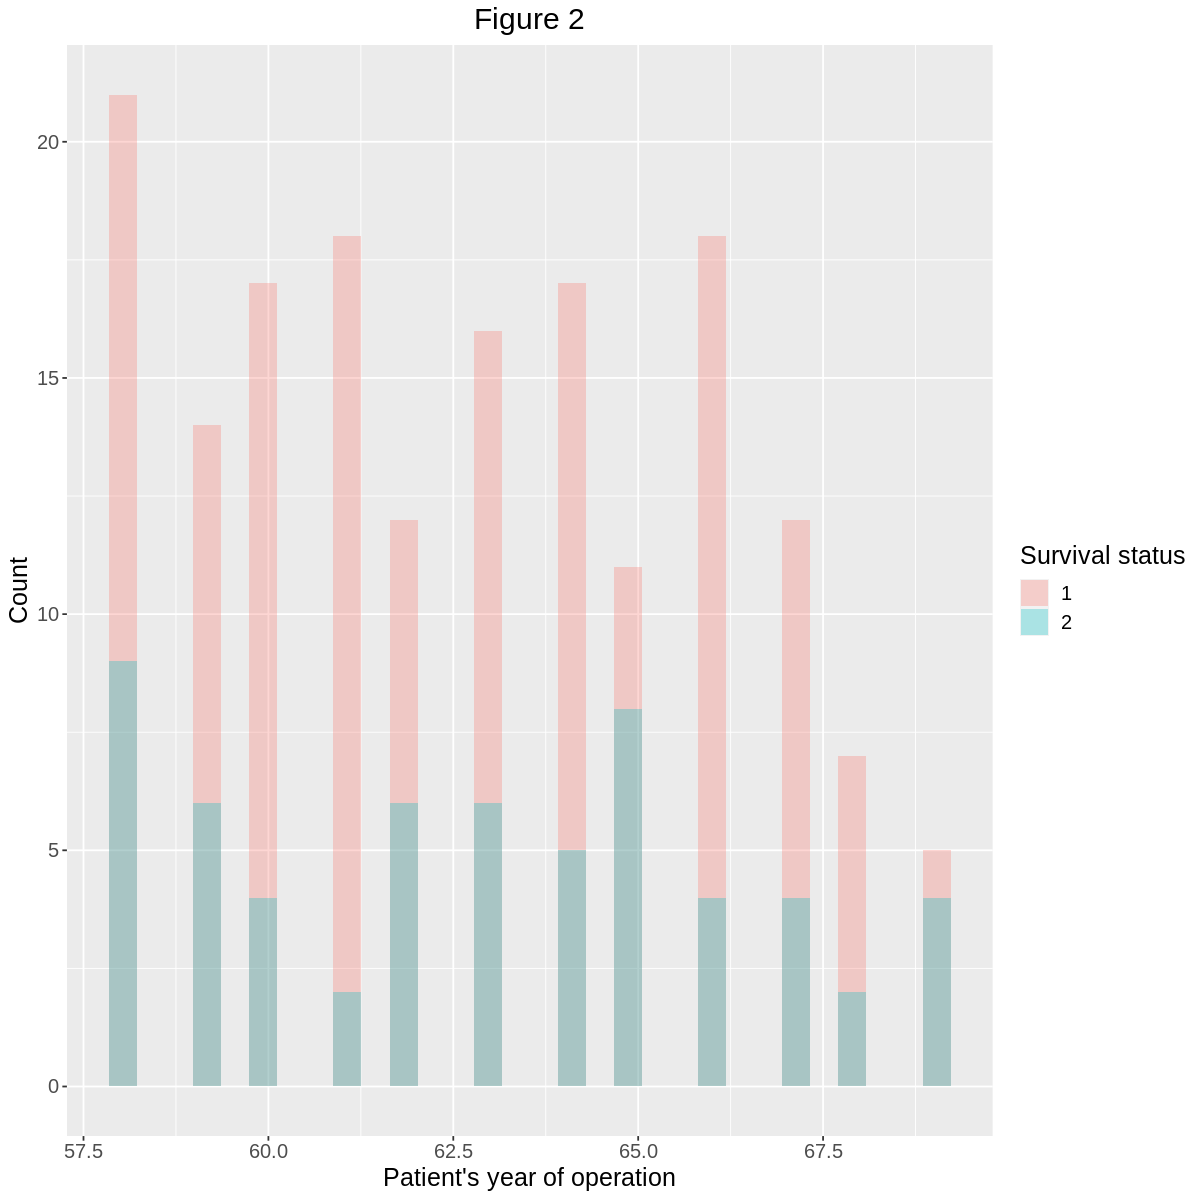

In [7]:
# Figure 2: Operation year distribution
options(repr.plot.width = 10, repr.plot.height = 10)

year_histogram <- patient_training |>
                  ggplot(aes(x = year_of_operation, fill = survival_status)) +
                  geom_histogram(alpha = 0.3, position = "identity") +
                  labs(x = "Patient's year of operation", y = "Count", fill = "Survival status") +
                  ggtitle("Figure 2") +
                  theme(text = element_text(size = 15),
                  plot.caption = element_text(hjust = 0.5),
                  plot.title = element_text(hjust = 0.5))

year_histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



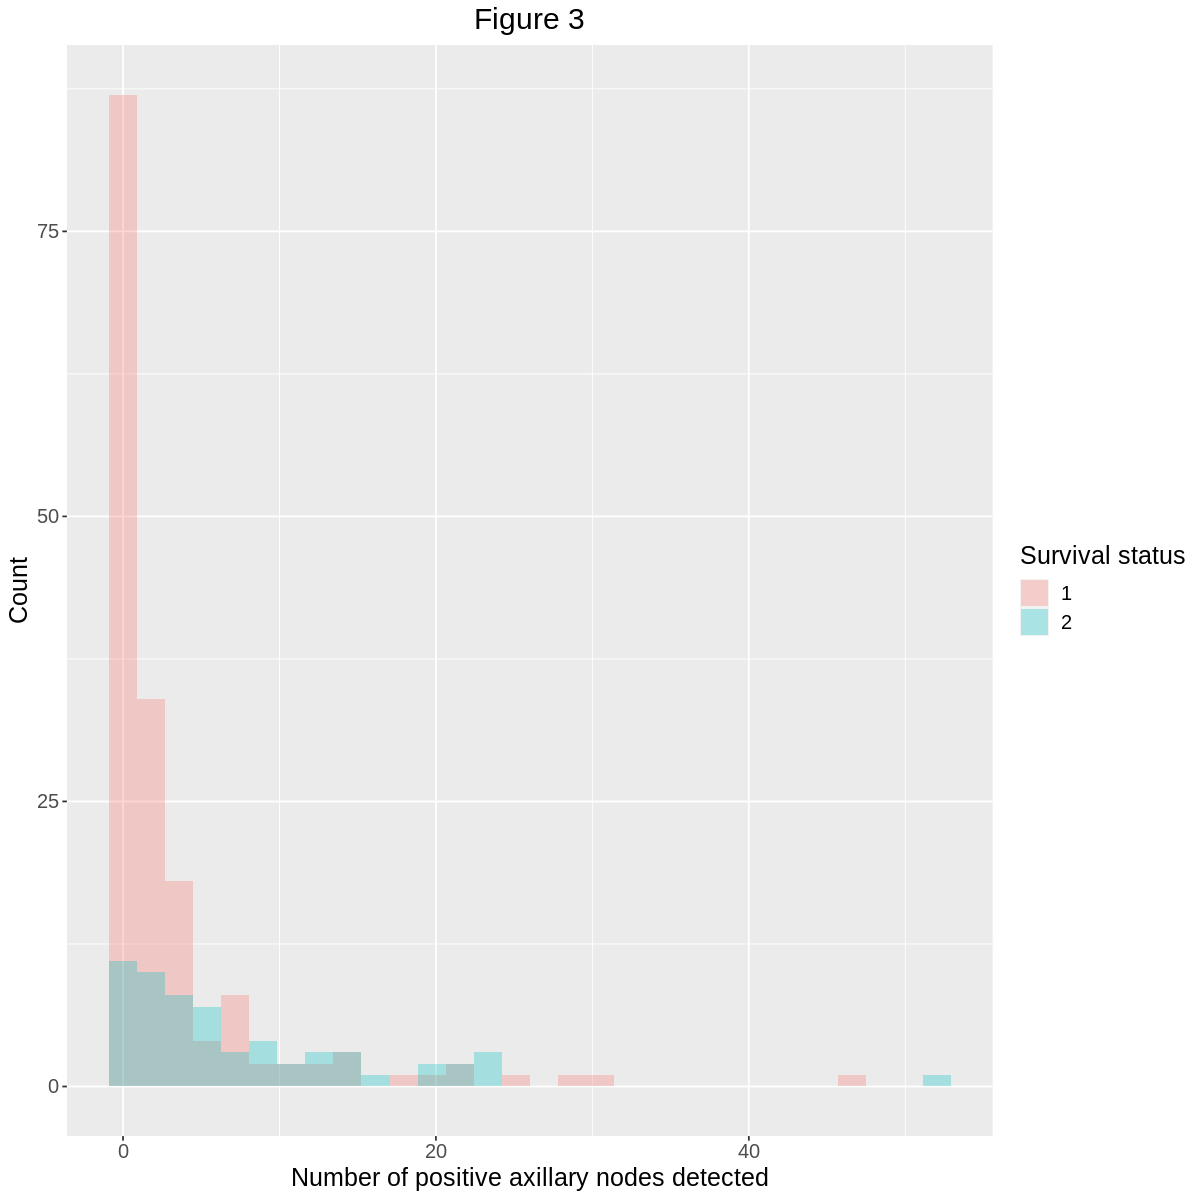

In [8]:
# Figure 3: Number of positive axillary nodes detected distribution
options(repr.plot.width = 10, repr.plot.height = 10)
nodesr_histogram <- patient_training |>
                    ggplot(aes(x = number_nodes, fill = survival_status)) +
                    geom_histogram(alpha = 0.3, position = "identity") +
                    labs(x = "Number of positive axillary nodes detected", y = "Count", fill = "Survival status") +
                    ggtitle("Figure 3") +
                    theme(text = element_text(size = 15),
                    plot.caption = element_text(hjust = 0.5),
                    plot.title = element_text(hjust = 0.5))

nodesr_histogram

Then we want to find whether there is a correaltion between any two out of three variables + `survival_status`. To find the answer, we will use bar chart.

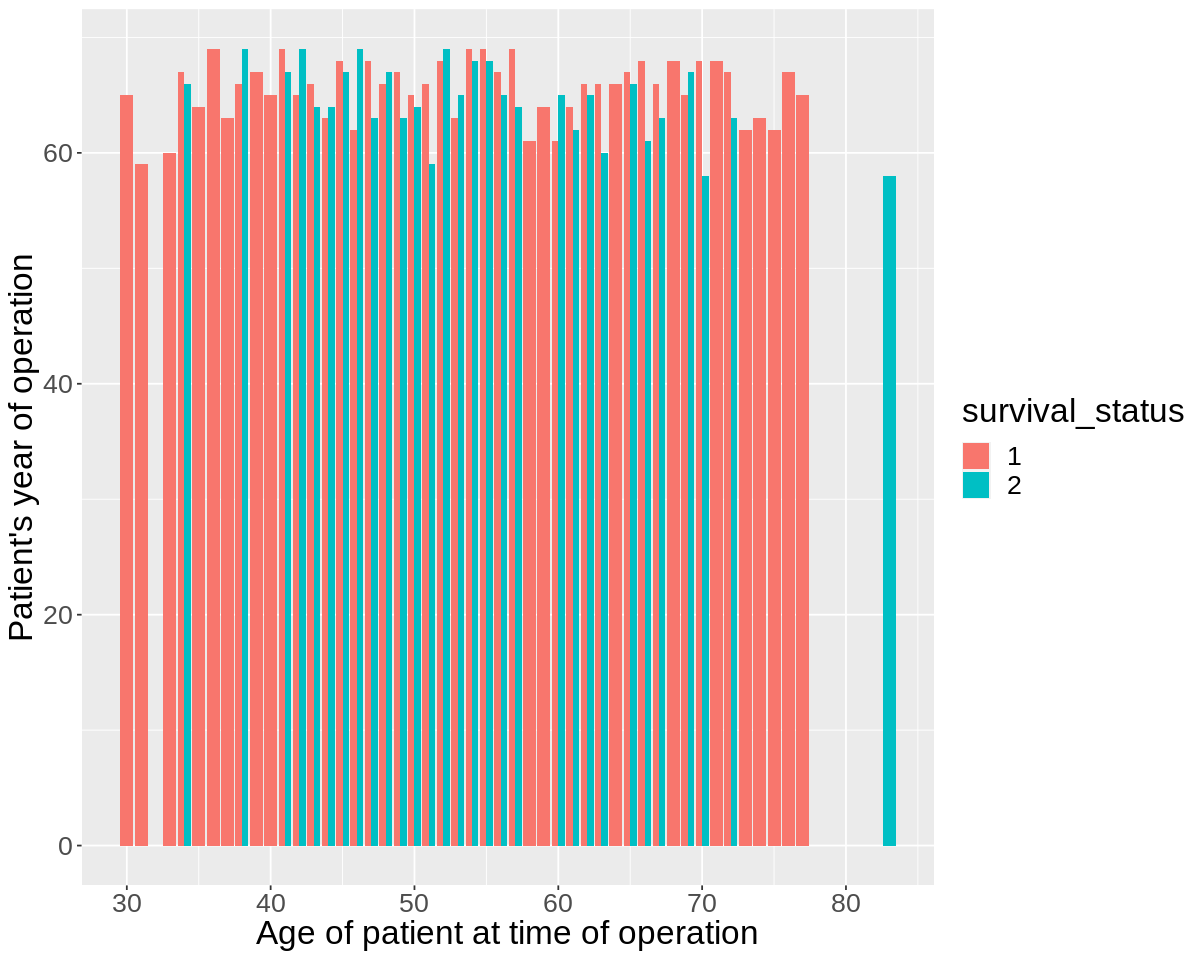

In [9]:
# Figure 4: Testing if there are correlation between age(when operation happened) , 
#           year (when operation happened) and how many years patients has left to live

options(repr.plot.width = 10, repr.plot.height = 8)

age_year_correaltion <- ggplot(data = patient_training, aes(x = age_when_operation, y = year_of_operation, fill = survival_status)) +
                        geom_bar(stat = "identity", position = "dodge") +
                        labs(x = "Age of patient at time of operation", y = "Patient's year of operation") +
                        theme(text = element_text(size = 20))

age_year_correaltion

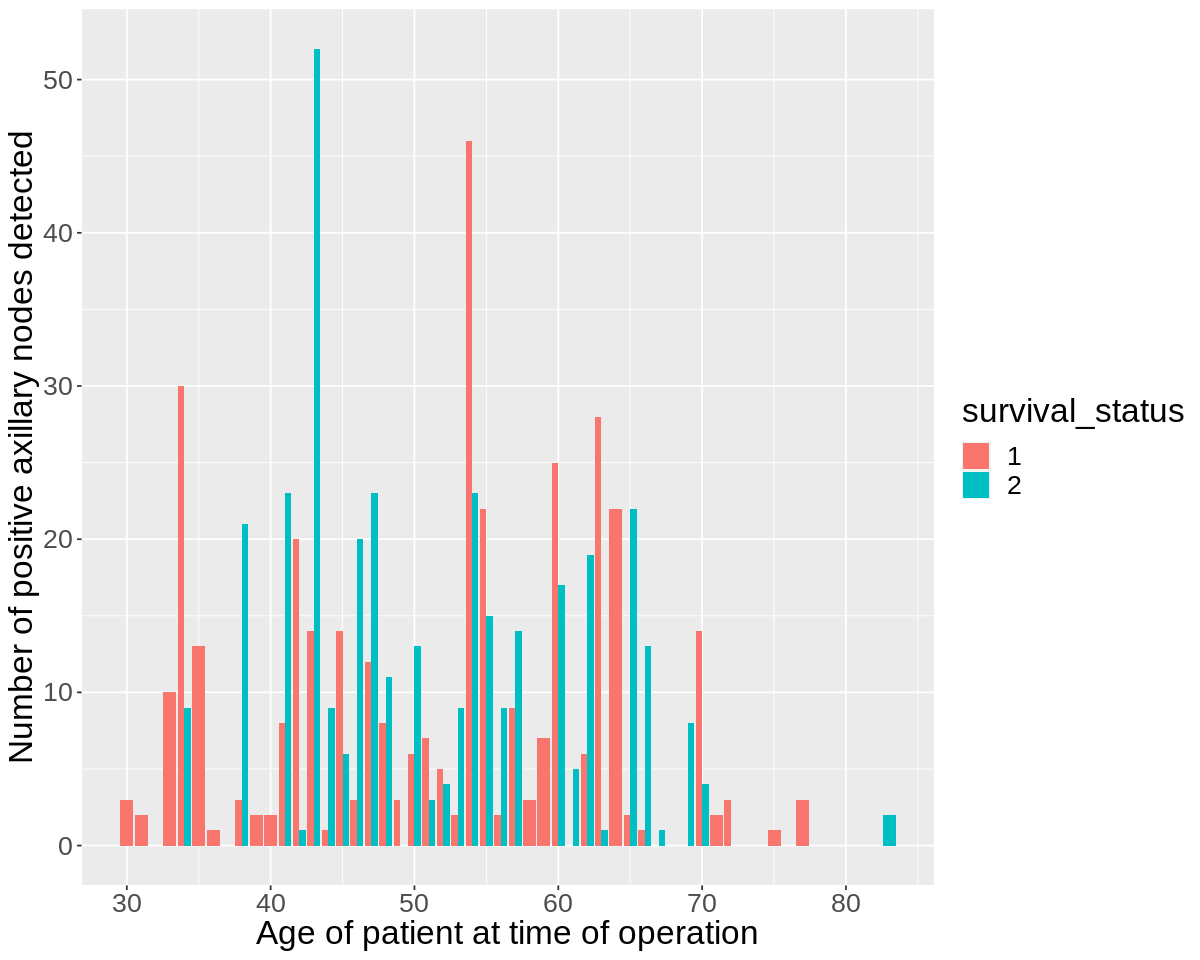

In [10]:
# Figure 5: Testing if there are correlation between age(when operation happened) , 
#           number of positive axillary nodes detected and how many years patients has left to live
options(repr.plot.width = 10, repr.plot.height = 8)

age_node_correaltion <- ggplot(data = patient_training, aes(x = age_when_operation, y = number_nodes, fill = survival_status)) +
                        geom_bar(stat = "identity", position = "dodge") +
                        labs(x = "Age of patient at time of operation", y = "Number of positive axillary nodes detected") +
                        theme(text = element_text(size = 20))
age_node_correaltion

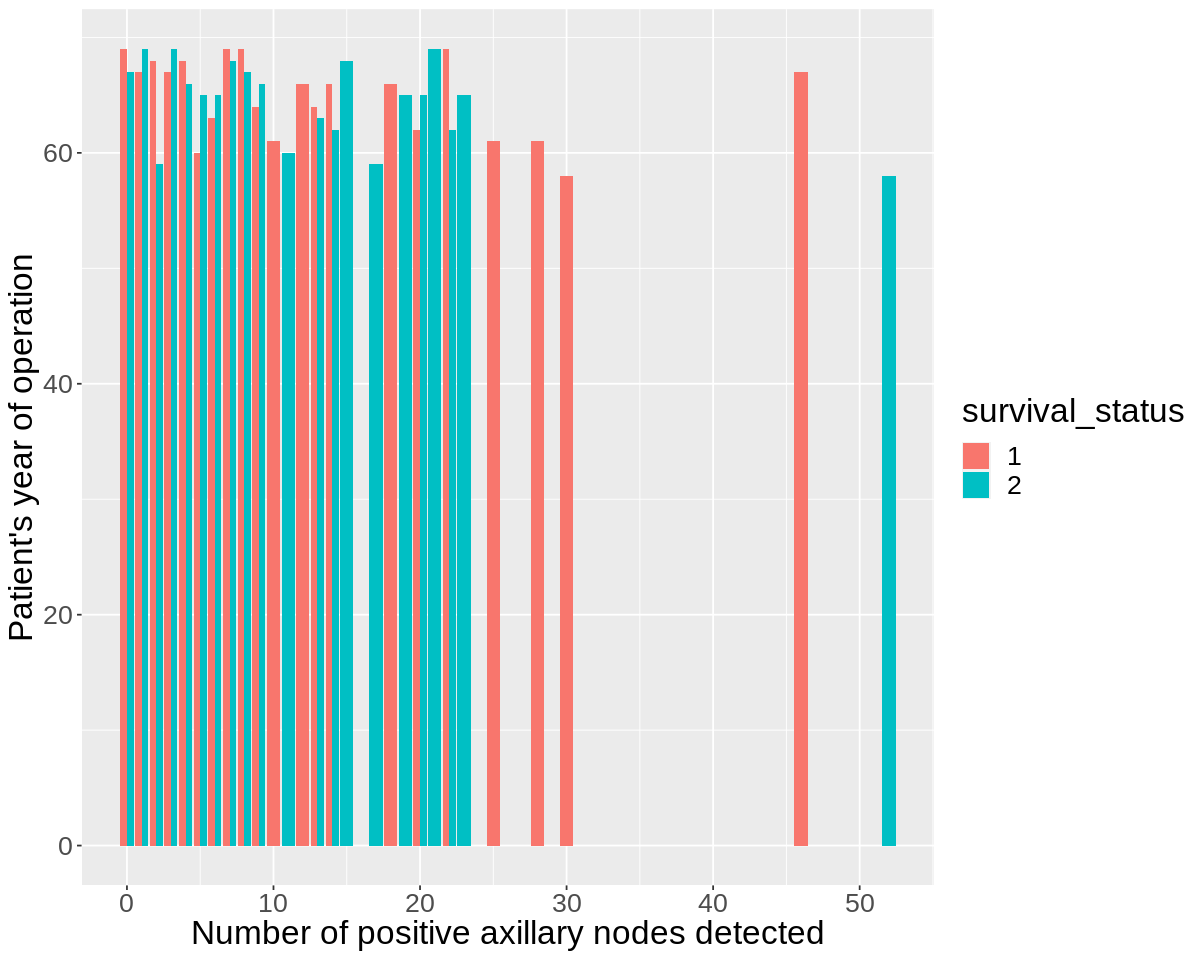

In [11]:
# Figure 6: Testing if there are correlation between number of positive axillary nodes detected, 
#           year (when operation happened) and how many years patients has left to live

options(repr.plot.width = 10, repr.plot.height = 8)
node_year_correaltion <- ggplot(data = patient_training, aes(x = number_nodes, y = year_of_operation, fill = survival_status)) +
                         geom_bar(stat = "identity", position = "dodge") +
                         labs(x = "Number of positive axillary nodes detected", y = "Patient's year of operation") +
                         theme(text = element_text(size = 20))
node_year_correaltion

# 3. Methods

### Variables selection

The distribution of each variable on`survival_status` has visualised above in the Preliminary exploratory data analysis. Figure 1 shows the distribution of the patient's `age_of_operation` on the patient's survival status. It can be clearly seen that the distribution of the second type survival status which is the patient died within 5 years increases with patient's age. So `age_of_operation` will be chosen as a predictor variable.

Figure 2 shows that the distribution of the patient's year of operation on the patient's survival status. It can hardly be seen a clear relationship between these two variables. Therefore `year_of_operation` will not be chosen as a predictor variable for predicting the patient's survival status.

Figure 3 indicates the distribution of the number of positive axillary nodes detected in the patient's body on the survival status of the patient. It is obvious that as the number of positive axillary nodes increases, the survival status of the patient tends to be more towards type 2 (the patient died within 5 years). In the smaller number of positive axillary nodes the patient's survival tends to be more towards type 1 (the patient survived 5 years or longer). This is a very strong relationship. So `number_nodes` should also be used as a predictor variable.

### Data analysis procedure

After determining the predictor variables as `age_of_operation` and `number_nodes`. train dataset will be used to predict the best K-value (K-nearest neighbors) with 5-fold cross-validation. The recipe of center and scale will be used to form the classifier. finally `patient_testing` will be used to test the accuracy of the classifier.

A two-dimensional scatter plot will be created with `age_of_operation` and `number_nodes` as axes and coloured for `survival_status` to visualise this prediction.

# 4. Expected outcomes and significance

### Expected findings

We will predict the patient's survival status based on the patient's age, and the number of positive axillary nodes detected in the patient's body. We will expect the patient's age to be a significant statistic. Older patients are considered to have a lower chance of survival. Also, the higher the number of positive axillary lymph nodes detected in a patient, the lower the chance of survival will be.

### Impacts

There is always some risk involved in any operation. If a patient may die within five years after operation, he may not be willing to take the risk of operation (such as dying during operation) in order to live five more years. Therefore by knowing the patient's age and year at the time of operation and predicting his survival status allows the patient to choose whether or not to undergo the operation.

### Future questions

The above data analysis is only related to the number of positive axillary lymph nodes detected and age. In the future, we can use cancer mutation(cells with too many mutations may stop working normally, grow out of control and become cancerous) as another relevant statistic to predict survival rates. Another question that raises is which statistic has the highest effect on survival status.